In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import kruskal

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('master_list_2697049_mhci.tsv', sep = '\t')
df

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,pair_aff_score,aff_score,sw_immunogenicity_score,sw_antigen_score,sw_prime_score,pair_imm_score,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score
0,HLA-A*02:03,YLQPRTFLL,6.59,P0DTC2,12.498252,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.13050,0.127588,...,0.000000,0.752391,0.735430,0.170434,0.357114,0.000000,0.441927,0.839536,0.839536,0.727339
1,HLA-A*02:01,YLQPRTFLL,4.30,P0DTC2,12.304971,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.13050,0.228937,...,0.238929,0.752391,0.735430,0.170434,0.642115,0.125367,0.441927,0.839536,0.839536,0.727339
2,HLA-A*29:02,YLQPRTFLL,349.55,P0DTC2,371.195028,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.13050,0.046896,...,0.004509,0.752391,0.735430,0.170434,0.130202,0.005576,0.441927,0.839536,0.839536,0.727339
3,HLA-A*24:02,YLQPRTFLL,274.80,P0DTC2,207.543471,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.13050,0.151580,...,0.042103,0.752391,0.735430,0.170434,0.424581,0.036070,0.441927,0.839536,0.839536,0.727339
4,HLA-A*23:01,YLQPRTFLL,189.75,P0DTC2,290.054507,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.13050,0.148831,...,0.010151,0.752391,0.735430,0.170434,0.416851,0.008603,0.441927,0.839536,0.839536,0.727339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,HLA-A*02:03,GIAIAMACL,282.15,P0DTC5,330.711221,0.008907,1,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.02094,0.014029,...,0.000000,0.000000,0.640340,0.453499,0.037777,NaN,0.000000,0.008698,0.008698,0.000870
2149,HLA-A*02:03,FLPFFSNVT,106.22,P0DTC2,225.624580,0.007944,1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.09113,0.024904,...,0.000000,0.000000,0.701259,0.165470,0.068359,NaN,0.000000,0.007700,0.007700,0.000770
2150,HLA-A*02:03,QLSSNFGAI,43.35,P0DTC2,34.781939,0.004774,1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.06481,0.040840,...,0.000000,0.000000,0.565915,0.319695,0.113172,NaN,0.000000,0.004416,0.004416,0.000442
2151,HLA-A*02:03,WLGFIAGLI,156.17,P0DTC2,69.670847,0.004548,1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.31735,0.013505,...,0.000000,0.000000,0.897602,0.058065,0.036304,NaN,0.000000,0.004181,0.004181,0.000418


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   allele                         2153 non-null   object 
 1   peptide                        2153 non-null   object 
 2   iedb_aff                       2153 non-null   float64
 3   protein_id                     2153 non-null   object 
 4   mhcflurry_aff                  2153 non-null   float64
 5   mhcflurry_processing_score     2153 non-null   float64
 6   number_binding_alleles         2153 non-null   int64  
 7   protein_sequence               2153 non-null   object 
 8   immunogenicity_score           2153 non-null   float64
 9   prime_score                    2153 non-null   float64
 10  antigen_score                  2153 non-null   float64
 11  probable_type                  2153 non-null   object 
 12  population_coverage            2153 non-null   f

In [5]:
df.isnull().sum()

allele                            0
peptide                           0
iedb_aff                          0
protein_id                        0
mhcflurry_aff                     0
mhcflurry_processing_score        0
number_binding_alleles            0
protein_sequence                  0
immunogenicity_score              0
prime_score                       0
antigen_score                     0
probable_type                     0
population_coverage               0
genot_freq                        0
length                            0
sw_mhcflurry_aff                  0
sw_iedb_aff                       0
genot_freq_sum_per_epitope        0
pair_aff_score                    0
aff_score                         0
sw_immunogenicity_score           0
sw_antigen_score                  0
sw_prime_score                    0
pair_imm_score                   21
imm_score                         0
sw_mhcflurry_processing_score     0
pro_score                         0
rank_score                  

In [6]:
len(df['allele'].unique())

73

There are 73 unique alleles

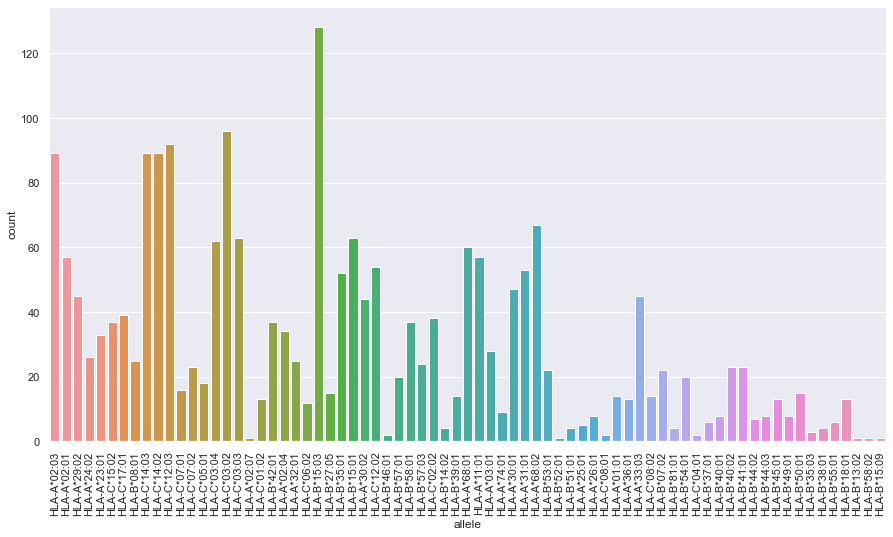

In [3]:
#should we add?
plt.figure(figsize = (15, 8))
sns.countplot(x = 'allele', data = df)
plt.xticks(rotation = 90)
plt.show()

HLA-B*15:03, HLA-C*03:02, HLA-C*12:03, HLA-A*02:03, HLA-C*14:03 are the most frequent alleles

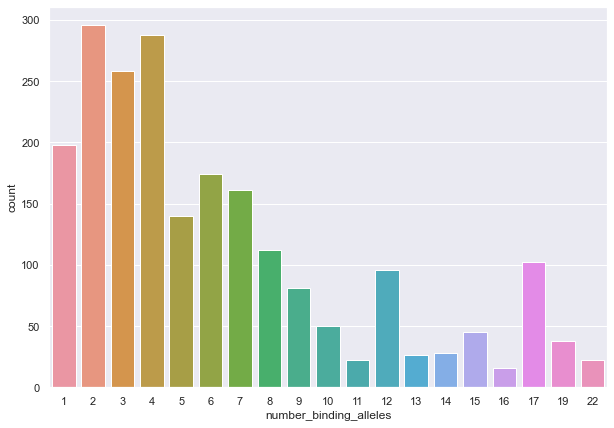

In [4]:
#should we add this?
plt.figure(figsize = (10, 7))
sns.countplot(x = 'number_binding_alleles', data = df)
plt.show()

Most of the peptides have upto 7 binding alleles

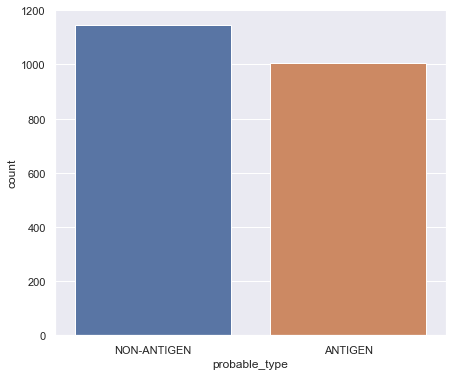

In [12]:
#should we add this?
plt.figure(figsize = (7, 6))
sns.countplot(x = 'probable_type', data = df)
plt.show()

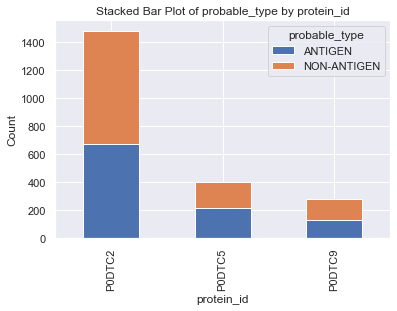

In [13]:
#should we add this?
grouped = df.groupby(['protein_id', 'probable_type']).size().reset_index(name='count')
pivot = grouped.pivot(index='protein_id', columns='probable_type', values='count')
ax = pivot.plot(kind='bar', stacked=True)
ax.set_xlabel('protein_id')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Plot of probable_type by protein_id')

# Show the plot
plt.show()

PODTC2 gives maximum peptide sequences but most are non-antigens

<AxesSubplot:xlabel='length', ylabel='count'>

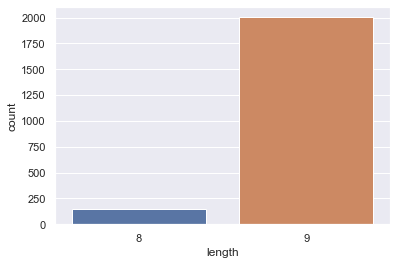

In [15]:
#should we add this?
sns.countplot(x = 'length', data = df)

Most of the peptides have length 9

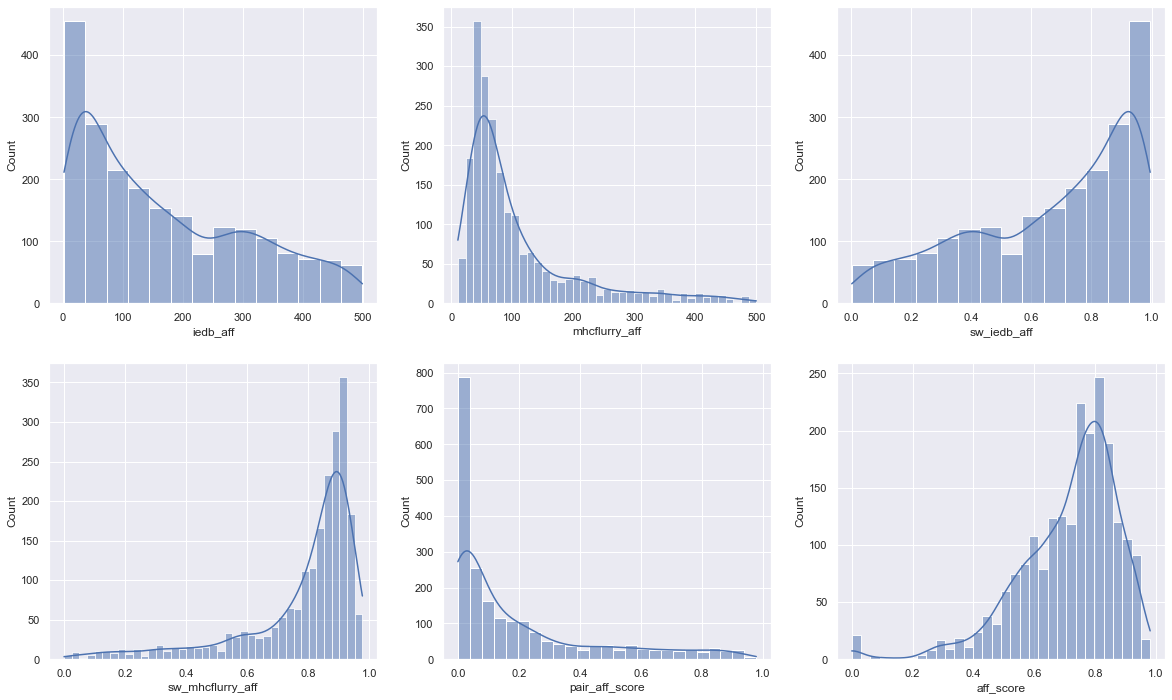

In [21]:
#not important
aff_scores = ['iedb_aff', 'mhcflurry_aff', 'sw_iedb_aff', 'sw_mhcflurry_aff', 'pair_aff_score',  'aff_score']

fig, axes = plt.subplots(2,3, figsize = (20, 12)) 

for param, ax in zip(aff_scores, axes.flatten()):
    sns.histplot(data=df, x=param, kde=True, ax = ax)

The final aff_score is normalised a bit but is negatively skewed

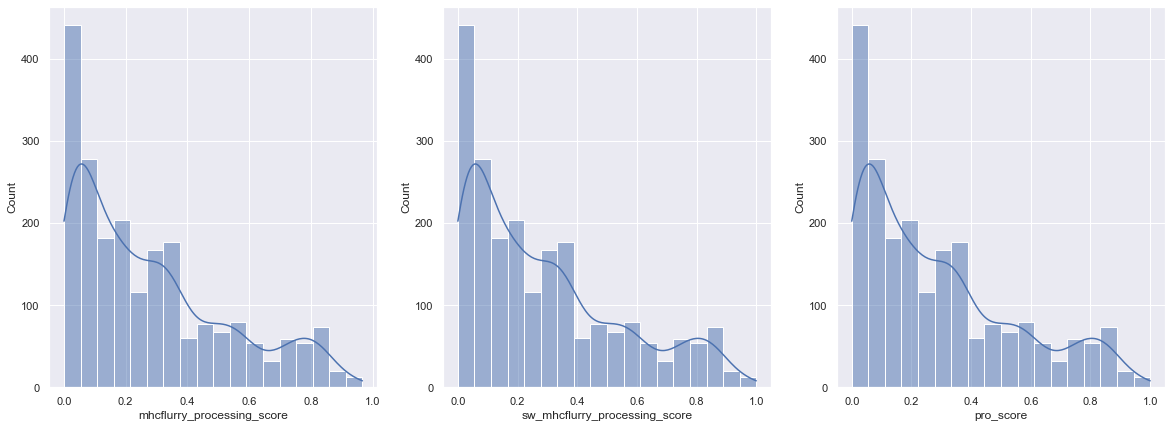

In [4]:
#not important
pro_scores = ['mhcflurry_processing_score', 'sw_mhcflurry_processing_score', 'pro_score']

fig, axes = plt.subplots(1,3, figsize = (20, 7)) 

for param, ax in zip(pro_scores, axes.flatten()):
    sns.histplot(data=df, x=param, kde=True, ax = ax)

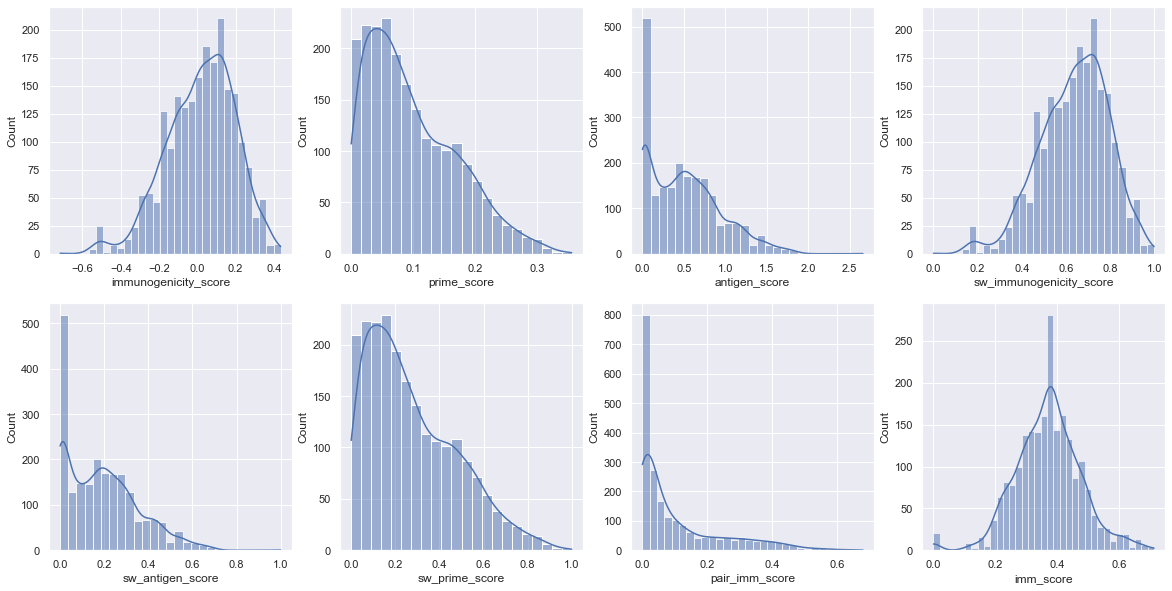

In [5]:
#not important
imm_scores = ['immunogenicity_score', 'prime_score', 'antigen_score', 'sw_immunogenicity_score', 'sw_antigen_score',
               'sw_prime_score', 'pair_imm_score', 'imm_score']

fig, axes = plt.subplots(2,4, figsize = (20, 10)) 

for param, ax in zip(imm_scores, axes.flatten()):
    sns.histplot(data=df, x=param, kde=True, ax = ax)

The immunogenicity_score & the final imm_score follows a normalised distribution

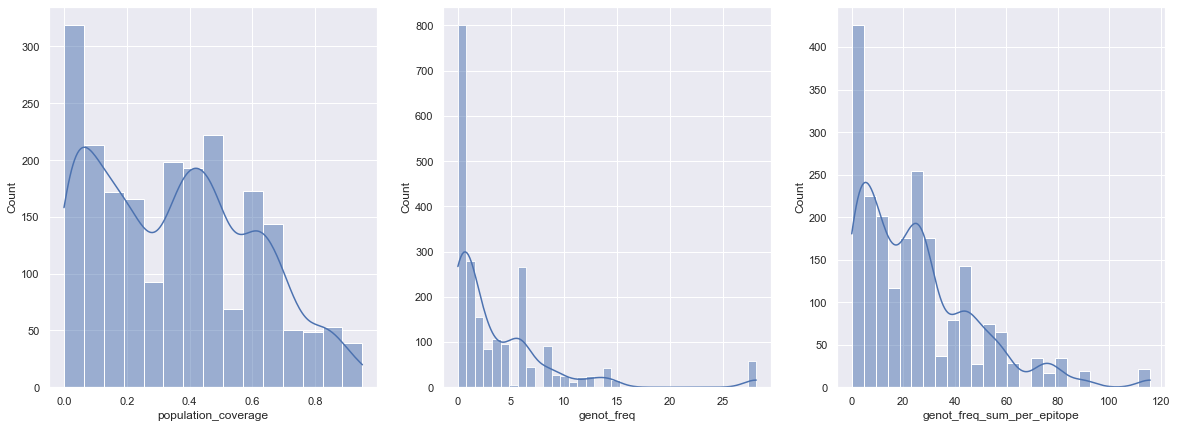

In [6]:
#not important
pop_coverage = ['population_coverage', 'genot_freq', 'genot_freq_sum_per_epitope']

fig, axes = plt.subplots(1,3, figsize = (20, 7)) 

for param, ax in zip(pop_coverage, axes.flatten()):
    sns.histplot(data=df, x=param, kde=True, ax = ax)

<AxesSubplot:xlabel='rank_score', ylabel='Count'>

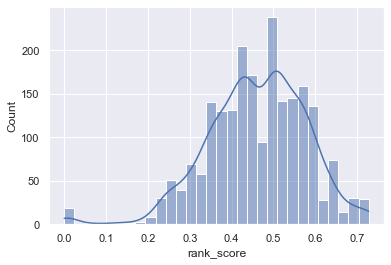

In [7]:
#not important
sns.histplot(data=df, x='rank_score', kde=True)

The rank_score also follows a normalised distribution

<AxesSubplot:>

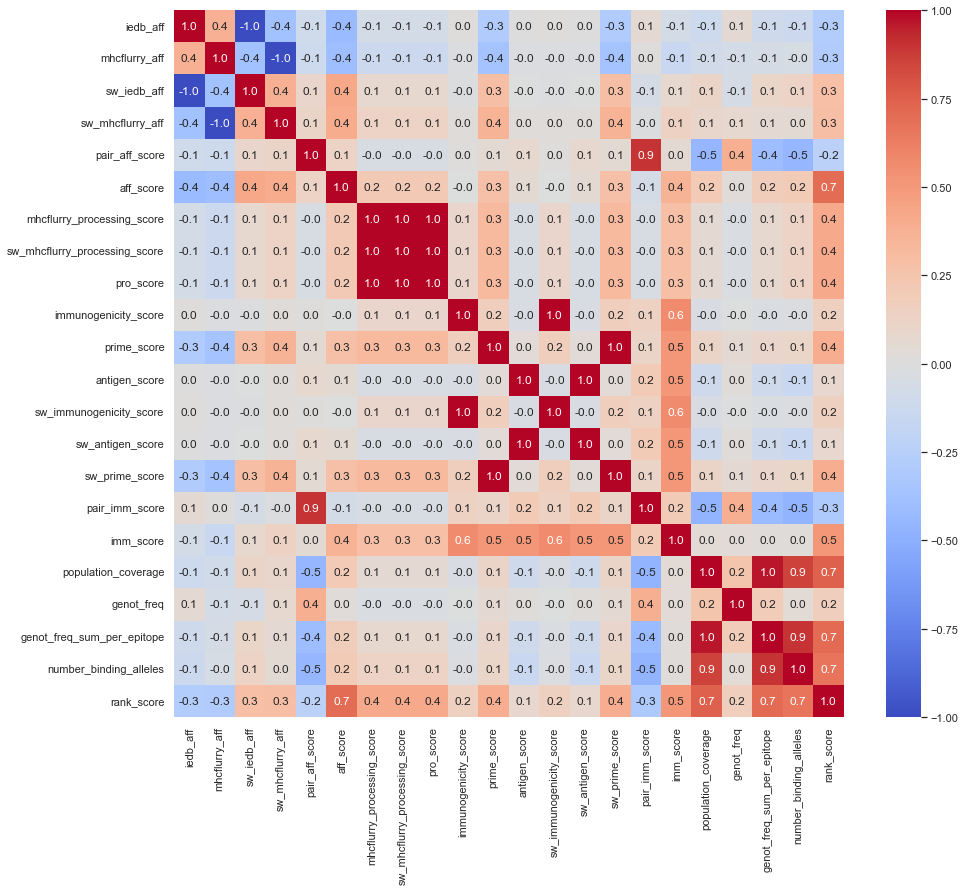

In [8]:
#important - added on heatmap slide
num_features = aff_scores + pro_scores + imm_scores + pop_coverage + ['number_binding_alleles', 'rank_score']
correlation = df[num_features].corr()
plt.figure(figsize = (15, 13))
sns.heatmap(data = correlation, cmap = 'coolwarm', annot = True, fmt = '.1f')

The final rank_score is heavily correlated to population_coverage(0.8), aff_score(0.7), genot_freq_sum_per_epitope(0.7), number_biding_alleles(0.7) and is less correlated to pro_score(0.4) & imm_score(0.5)

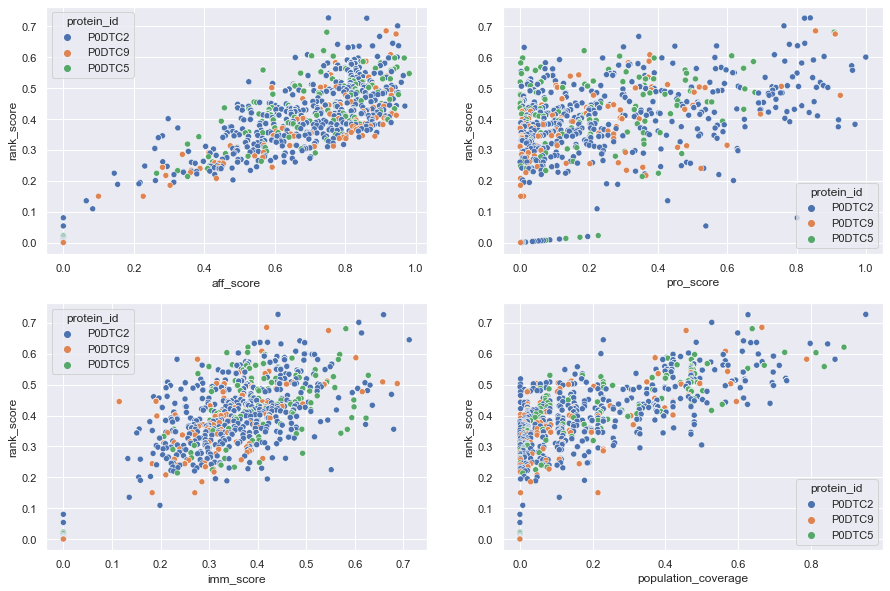

In [3]:
#important - added on rank slide
rank_formula_features = ['aff_score', 'pro_score', 'imm_score', 'population_coverage']

fig, axes = plt.subplots(2,2, figsize = (15, 10)) 

for param, ax in zip(rank_formula_features, axes.flatten()):
    sns.scatterplot(data = df, x =param, y = 'rank_score', hue = 'protein_id', ax = ax)



For pro_score & imm_score the linear correlation is very less

In [4]:
def binding_alleles_range(number):
    if number == 1:
        return '1'
    elif number == 2:
        return '2'
    elif number >= 3 and number <= 8:
        return '3-8'
    elif number >= 9 and number <= 15:
        return '9-15'
    else:
        return '16+'
    
df['binding_alleles_range'] = df['number_binding_alleles'].apply(binding_alleles_range)
df.head()

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,aff_score,sw_immunogenicity_score,sw_antigen_score,sw_prime_score,pair_imm_score,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score,binding_alleles_range
0,HLA-A*02:03,YLQPRTFLL,6.59,P0DTC2,12.498252,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.127588,...,0.752391,0.73543,0.170434,0.357114,0.000000,0.441927,0.839536,0.839536,0.727339,16+
1,HLA-A*02:01,YLQPRTFLL,4.30,P0DTC2,12.304971,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.228937,...,0.752391,0.73543,0.170434,0.642115,0.125367,0.441927,0.839536,0.839536,0.727339,16+
2,HLA-A*29:02,YLQPRTFLL,349.55,P0DTC2,371.195028,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.046896,...,0.752391,0.73543,0.170434,0.130202,0.005576,0.441927,0.839536,0.839536,0.727339,16+
3,HLA-A*24:02,YLQPRTFLL,274.80,P0DTC2,207.543471,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.151580,...,0.752391,0.73543,0.170434,0.424581,0.036070,0.441927,0.839536,0.839536,0.727339,16+
4,HLA-A*23:01,YLQPRTFLL,189.75,P0DTC2,290.054507,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.148831,...,0.752391,0.73543,0.170434,0.416851,0.008603,0.441927,0.839536,0.839536,0.727339,16+


<AxesSubplot:xlabel='population_coverage', ylabel='rank_score'>

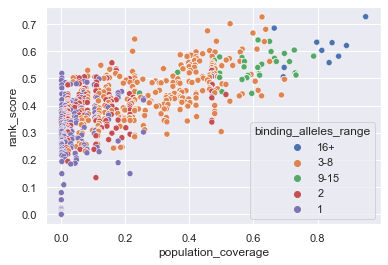

In [5]:
sns.scatterplot(data = df, x =param, y = 'rank_score', hue = 'binding_alleles_range')

Text(0.5, 1.0, 'pair_aff_score vs pair_imm_score')

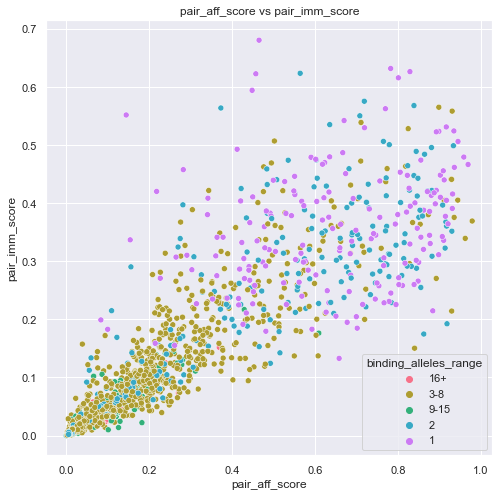

In [16]:
#important - added on pair_aff & pair_imm scores slides
plt.figure(figsize = (8,8))
sns.scatterplot(data = df, x ='pair_aff_score', y = 'pair_imm_score', hue = 'binding_alleles_range', palette = 'husl')
plt.title('pair_aff_score vs pair_imm_score')

The pair_aff_score & pair_imm_score are linearly correleated

In [5]:
x= df.groupby(by=['peptide'])['pair_aff_score'].mean()
df2= pd.merge(df, x, how='inner', left_on = 'peptide', right_on = 'peptide')
df2.rename(columns={'pair_aff_score_y':'mean_pair_aff_score_epi'}, inplace=True)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   allele                         2153 non-null   object 
 1   peptide                        2153 non-null   object 
 2   iedb_aff                       2153 non-null   float64
 3   protein_id                     2153 non-null   object 
 4   mhcflurry_aff                  2153 non-null   float64
 5   mhcflurry_processing_score     2153 non-null   float64
 6   number_binding_alleles         2153 non-null   int64  
 7   protein_sequence               2153 non-null   object 
 8   immunogenicity_score           2153 non-null   float64
 9   prime_score                    2153 non-null   float64
 10  antigen_score                  2153 non-null   float64
 11  probable_type                  2153 non-null   object 
 12  population_coverage            2153 non-null   f

<AxesSubplot:xlabel='mean_pair_aff_score_epi', ylabel='aff_score'>

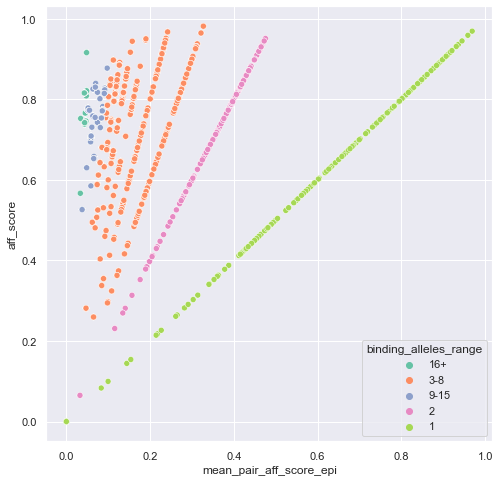

In [7]:
#important - added on pair_aff slide
plt.figure(figsize = (8,8))
sns.scatterplot(data = df2, x ='mean_pair_aff_score_epi', y = 'aff_score', hue = 'binding_alleles_range', palette = 'Set2')

In [8]:
df2['diff_bw_aff_mean_pair_aff'] = np.abs(df2['aff_score'] - df2['mean_pair_aff_score_epi'])
df2.head()

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,sw_antigen_score,sw_prime_score,pair_imm_score,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score,binding_alleles_range,mean_pair_aff_score_epi,diff_bw_aff_mean_pair_aff
0,HLA-A*02:03,YLQPRTFLL,6.59,P0DTC2,12.498252,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.127588,...,0.170434,0.357114,0.000000,0.441927,0.839536,0.839536,0.727339,16+,0.0342,0.718191
1,HLA-A*02:01,YLQPRTFLL,4.30,P0DTC2,12.304971,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.228937,...,0.170434,0.642115,0.125367,0.441927,0.839536,0.839536,0.727339,16+,0.0342,0.718191
2,HLA-A*29:02,YLQPRTFLL,349.55,P0DTC2,371.195028,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.046896,...,0.170434,0.130202,0.005576,0.441927,0.839536,0.839536,0.727339,16+,0.0342,0.718191
3,HLA-A*24:02,YLQPRTFLL,274.80,P0DTC2,207.543471,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.151580,...,0.170434,0.424581,0.036070,0.441927,0.839536,0.839536,0.727339,16+,0.0342,0.718191
4,HLA-A*23:01,YLQPRTFLL,189.75,P0DTC2,290.054507,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.148831,...,0.170434,0.416851,0.008603,0.441927,0.839536,0.839536,0.727339,16+,0.0342,0.718191


<AxesSubplot:ylabel='diff_bw_aff_mean_pair_aff'>

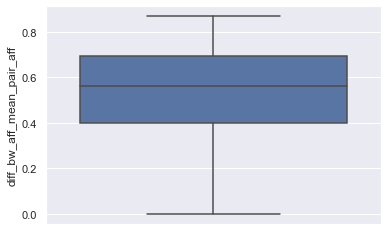

In [9]:
#important - added on pair_aff slide
sns.boxplot(y = 'diff_bw_aff_mean_pair_aff', data = df2)

In [10]:
def aff_score_mean_aff_score_diff_quantile(diff):
     if diff <= np.quantile(df2['diff_bw_aff_mean_pair_aff'], 0.25):
        return f"Less than {round(np.quantile(df2['diff_bw_aff_mean_pair_aff'], 0.25),2)}"
     elif diff > np.quantile(df2['diff_bw_aff_mean_pair_aff'], 0.25) and diff <=  np.quantile(df2['diff_bw_aff_mean_pair_aff'], 0.5):
        return f"Less than {round(np.quantile(df2['diff_bw_aff_mean_pair_aff'], 0.5),2)}"
     elif diff > np.quantile(df2['diff_bw_aff_mean_pair_aff'], 0.5) and diff <= np.quantile(df2['diff_bw_aff_mean_pair_aff'], 0.75):
        return f"Less than {round(np.quantile(df2['diff_bw_aff_mean_pair_aff'], 0.75),2)}"
     else:
        return f"Greater than {round(np.quantile(df2['diff_bw_aff_mean_pair_aff'], 0.75),2)}"
    
df2['aff_score_mean_aff_score_diff_quantile'] = df2['diff_bw_aff_mean_pair_aff'].apply(aff_score_mean_aff_score_diff_quantile)
df2.head()
    

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,sw_prime_score,pair_imm_score,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score,binding_alleles_range,mean_pair_aff_score_epi,diff_bw_aff_mean_pair_aff,aff_score_mean_aff_score_diff_quantile
0,HLA-A*02:03,YLQPRTFLL,6.59,P0DTC2,12.498252,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.127588,...,0.357114,0.000000,0.441927,0.839536,0.839536,0.727339,16+,0.0342,0.718191,Greater than 0.7
1,HLA-A*02:01,YLQPRTFLL,4.30,P0DTC2,12.304971,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.228937,...,0.642115,0.125367,0.441927,0.839536,0.839536,0.727339,16+,0.0342,0.718191,Greater than 0.7
2,HLA-A*29:02,YLQPRTFLL,349.55,P0DTC2,371.195028,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.046896,...,0.130202,0.005576,0.441927,0.839536,0.839536,0.727339,16+,0.0342,0.718191,Greater than 0.7
3,HLA-A*24:02,YLQPRTFLL,274.80,P0DTC2,207.543471,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.151580,...,0.424581,0.036070,0.441927,0.839536,0.839536,0.727339,16+,0.0342,0.718191,Greater than 0.7
4,HLA-A*23:01,YLQPRTFLL,189.75,P0DTC2,290.054507,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.148831,...,0.416851,0.008603,0.441927,0.839536,0.839536,0.727339,16+,0.0342,0.718191,Greater than 0.7


<AxesSubplot:xlabel='mean_pair_aff_score_epi', ylabel='aff_score'>

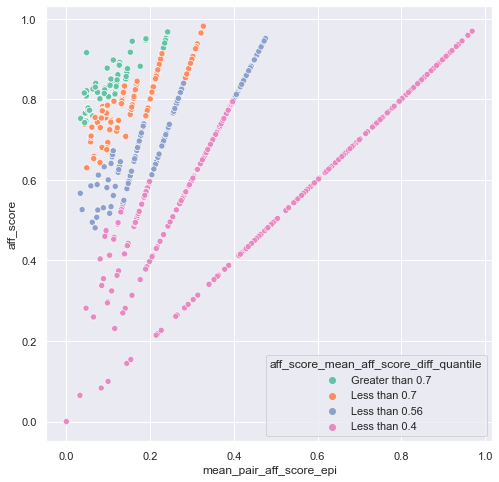

In [11]:
#important - added on pair_aff slide
plt.figure(figsize = (8,8))
sns.scatterplot(data = df2, x ='mean_pair_aff_score_epi', y = 'aff_score', hue = 'aff_score_mean_aff_score_diff_quantile', palette = 'Set2')

In [37]:
#important - added on pair_aff slide
df2_epi_alle = df2[df2['diff_bw_aff_mean_pair_aff'] > round(np.quantile(df2['diff_bw_aff_mean_pair_aff'], 0.75),2)]
df2_epi_alle[['peptide', 'allele', 'pair_aff_score_x', 'mean_pair_aff_score_epi', 'genot_freq',  'aff_score', 'diff_bw_aff_mean_pair_aff']].sort_values(by = 'diff_bw_aff_mean_pair_aff', ascending = False)

,peptide,allele,pair_aff_score_x,mean_pair_aff_score_epi,genot_freq,aff_score,diff_bw_aff_mean_pair_aff
43,KAYNVTQAF,HLA-C*14:02,0.018860,0.048211,1.09,0.916009,0.867798
41,KAYNVTQAF,HLA-C*15:02,0.028248,0.048211,2.13,0.916009,0.867798
51,KAYNVTQAF,HLA-C*02:02,0.117943,0.048211,6.45,0.916009,0.867798
50,KAYNVTQAF,HLA-C*03:02,0.008128,0.048211,0.43,0.916009,0.867798
49,KAYNVTQAF,HLA-C*12:03,0.156110,0.048211,8.29,0.916009,0.867798
...,...,...,...,...,...,...,...
550,SAPHGVVFL,HLA-C*14:02,0.024672,0.116714,1.09,0.817000,0.700286
553,SAPHGVVFL,HLA-C*03:04,0.185532,0.116714,6.01,0.817000,0.700286
555,SAPHGVVFL,HLA-C*14:03,0.000453,0.116714,0.02,0.817000,0.700286
556,SAPHGVVFL,HLA-C*17:01,0.039453,0.116714,1.36,0.817000,0.700286


In [16]:
y= df.groupby(by=['peptide'])['pair_imm_score'].mean()
df3= pd.merge(df, y, how='inner', left_on = 'peptide', right_on = 'peptide')
df3.rename(columns={'pair_imm_score_y':'mean_pair_imm_score_epi'}, inplace=True)

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   allele                         2153 non-null   object 
 1   peptide                        2153 non-null   object 
 2   iedb_aff                       2153 non-null   float64
 3   protein_id                     2153 non-null   object 
 4   mhcflurry_aff                  2153 non-null   float64
 5   mhcflurry_processing_score     2153 non-null   float64
 6   number_binding_alleles         2153 non-null   int64  
 7   protein_sequence               2153 non-null   object 
 8   immunogenicity_score           2153 non-null   float64
 9   prime_score                    2153 non-null   float64
 10  antigen_score                  2153 non-null   float64
 11  probable_type                  2153 non-null   object 
 12  population_coverage            2153 non-null   f

<AxesSubplot:xlabel='mean_pair_imm_score_epi', ylabel='imm_score'>

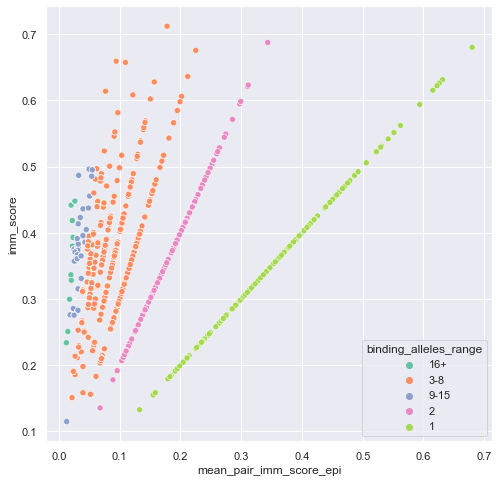

In [18]:
#important - added on pair_imm slide
plt.figure(figsize = (8,8))
sns.scatterplot(data = df3, x ='mean_pair_imm_score_epi', y = 'imm_score', hue = 'binding_alleles_range',  palette = 'Set2')

In [19]:
df3['diff_bw_imm_mean_pair_imm'] = np.abs(df3['imm_score'] - df3['mean_pair_imm_score_epi'])
df3.head()

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,sw_antigen_score,sw_prime_score,pair_imm_score_x,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score,binding_alleles_range,mean_pair_imm_score_epi,diff_bw_imm_mean_pair_imm
0,HLA-A*02:03,YLQPRTFLL,6.59,P0DTC2,12.498252,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.127588,...,0.170434,0.357114,0.000000,0.441927,0.839536,0.839536,0.727339,16+,0.020088,0.421839
1,HLA-A*02:01,YLQPRTFLL,4.30,P0DTC2,12.304971,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.228937,...,0.170434,0.642115,0.125367,0.441927,0.839536,0.839536,0.727339,16+,0.020088,0.421839
2,HLA-A*29:02,YLQPRTFLL,349.55,P0DTC2,371.195028,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.046896,...,0.170434,0.130202,0.005576,0.441927,0.839536,0.839536,0.727339,16+,0.020088,0.421839
3,HLA-A*24:02,YLQPRTFLL,274.80,P0DTC2,207.543471,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.151580,...,0.170434,0.424581,0.036070,0.441927,0.839536,0.839536,0.727339,16+,0.020088,0.421839
4,HLA-A*23:01,YLQPRTFLL,189.75,P0DTC2,290.054507,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.148831,...,0.170434,0.416851,0.008603,0.441927,0.839536,0.839536,0.727339,16+,0.020088,0.421839


<AxesSubplot:ylabel='diff_bw_imm_mean_pair_imm'>

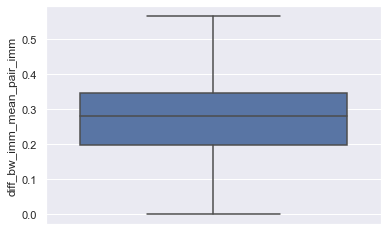

In [20]:
#important - added on pair_imm slide
sns.boxplot(y = 'diff_bw_imm_mean_pair_imm', data = df3)

In [22]:
df3['diff_bw_imm_mean_pair_imm'].fillna(0, inplace = True)

In [23]:
def imm_score_median_imm_score_diff_quantile(diff):
     if diff <= np.quantile(df3['diff_bw_imm_mean_pair_imm'], 0.25):
        return f"Less than {round(np.quantile(df3['diff_bw_imm_mean_pair_imm'], 0.25),2)}"
     elif diff > np.quantile(df3['diff_bw_imm_mean_pair_imm'], 0.25) and diff <=  np.quantile(df3['diff_bw_imm_mean_pair_imm'], 0.5):
        return f"Less than {round(np.quantile(df3['diff_bw_imm_mean_pair_imm'], 0.5),2)}"
     elif diff > np.quantile(df3['diff_bw_imm_mean_pair_imm'], 0.5) and diff <= np.quantile(df3['diff_bw_imm_mean_pair_imm'], 0.75):
        return f"Less than {round(np.quantile(df3['diff_bw_imm_mean_pair_imm'], 0.75),2)}"
     else:
        return f"Greater than {round(np.quantile(df3['diff_bw_imm_mean_pair_imm'], 0.75),2)}"
    
df3['imm_score_mean_imm_score_diff_quantile'] = df3['diff_bw_imm_mean_pair_imm'].apply(imm_score_median_imm_score_diff_quantile)
df3.head()

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,sw_prime_score,pair_imm_score_x,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score,binding_alleles_range,mean_pair_imm_score_epi,diff_bw_imm_mean_pair_imm,imm_score_mean_imm_score_diff_quantile
0,HLA-A*02:03,YLQPRTFLL,6.59,P0DTC2,12.498252,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.127588,...,0.357114,0.000000,0.441927,0.839536,0.839536,0.727339,16+,0.020088,0.421839,Greater than 0.35
1,HLA-A*02:01,YLQPRTFLL,4.30,P0DTC2,12.304971,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.228937,...,0.642115,0.125367,0.441927,0.839536,0.839536,0.727339,16+,0.020088,0.421839,Greater than 0.35
2,HLA-A*29:02,YLQPRTFLL,349.55,P0DTC2,371.195028,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.046896,...,0.130202,0.005576,0.441927,0.839536,0.839536,0.727339,16+,0.020088,0.421839,Greater than 0.35
3,HLA-A*24:02,YLQPRTFLL,274.80,P0DTC2,207.543471,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.151580,...,0.424581,0.036070,0.441927,0.839536,0.839536,0.727339,16+,0.020088,0.421839,Greater than 0.35
4,HLA-A*23:01,YLQPRTFLL,189.75,P0DTC2,290.054507,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.148831,...,0.416851,0.008603,0.441927,0.839536,0.839536,0.727339,16+,0.020088,0.421839,Greater than 0.35


<AxesSubplot:xlabel='mean_pair_imm_score_epi', ylabel='imm_score'>

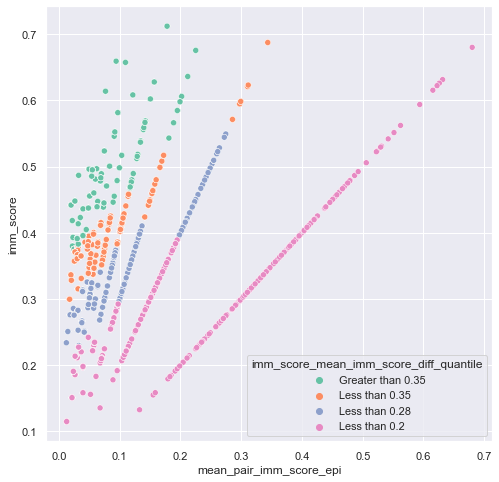

In [24]:
#important - added on pair_imm slide
plt.figure(figsize = (8,8))
sns.scatterplot(data = df3, x ='mean_pair_imm_score_epi', y = 'imm_score', hue = 'imm_score_mean_imm_score_diff_quantile',  palette = 'Set2')

In [36]:
df3_epi_alle = df3[df3['diff_bw_imm_mean_pair_imm'] > round(np.quantile(df3['diff_bw_imm_mean_pair_imm'], 0.75),2)]
df3_epi_alle[['peptide', 'allele', 'pair_imm_score_x', 'mean_pair_imm_score_epi', 'genot_freq', 'imm_score', 'diff_bw_imm_mean_pair_imm']].sort_values(by = 'diff_bw_imm_mean_pair_imm', ascending = False)

,peptide,allele,pair_imm_score_x,mean_pair_imm_score_epi,genot_freq,imm_score,diff_bw_imm_mean_pair_imm
25,VRFPNITNL,HLA-C*14:02,0.011221,0.094178,1.09,0.659248,0.565070
28,VRFPNITNL,HLA-B*27:05,0.062985,0.094178,4.28,0.659248,0.565070
27,VRFPNITNL,HLA-B*15:03,0.000909,0.094178,0.09,0.659248,0.565070
26,VRFPNITNL,HLA-C*14:03,0.000209,0.094178,0.02,0.659248,0.565070
24,VRFPNITNL,HLA-C*07:02,0.190576,0.094178,12.80,0.659248,0.565070
...,...,...,...,...,...,...,...
353,SANNCTFEY,HLA-B*58:01,0.005056,0.025026,0.76,0.375397,0.350371
354,SANNCTFEY,HLA-A*11:01,0.036326,0.025026,5.95,0.375397,0.350371
355,SANNCTFEY,HLA-A*30:02,0.002957,0.025026,0.45,0.375397,0.350371
356,SANNCTFEY,HLA-A*36:01,0.000000,0.025026,0.00,0.375397,0.350371


In [3]:
df['diff_bw_iedb_aff_mhcflurry_aff'] = np.abs(df['iedb_aff'] - df['mhcflurry_aff'])

def labelquartile(diff):
    if diff <= np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.25):
        return 'Less than 25%'
    elif diff > np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.25) and diff <=  np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.5):
        return 'Less than 50%'
    elif diff > np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.5) and diff <= np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.75):
        return 'Less than 75%'
    else:
        return 'Greater than 75%'
    
df['Affinity_Quantile'] = df['diff_bw_iedb_aff_mhcflurry_aff'].apply(labelquartile)
df.head()

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,sw_immunogenicity_score,sw_antigen_score,sw_prime_score,pair_imm_score,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score,diff_bw_iedb_aff_mhcflurry_aff,Affinity_Quantile
0,HLA-A*02:03,YLQPRTFLL,6.59,P0DTC2,12.498252,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.127588,...,0.73543,0.170434,0.357114,0.000000,0.441927,0.839536,0.839536,0.727339,5.908252,Less than 25%
1,HLA-A*02:01,YLQPRTFLL,4.30,P0DTC2,12.304971,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.228937,...,0.73543,0.170434,0.642115,0.125367,0.441927,0.839536,0.839536,0.727339,8.004971,Less than 25%
2,HLA-A*29:02,YLQPRTFLL,349.55,P0DTC2,371.195028,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.046896,...,0.73543,0.170434,0.130202,0.005576,0.441927,0.839536,0.839536,0.727339,21.645028,Less than 25%
3,HLA-A*24:02,YLQPRTFLL,274.80,P0DTC2,207.543471,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.151580,...,0.73543,0.170434,0.424581,0.036070,0.441927,0.839536,0.839536,0.727339,67.256529,Less than 75%
4,HLA-A*23:01,YLQPRTFLL,189.75,P0DTC2,290.054507,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.148831,...,0.73543,0.170434,0.416851,0.008603,0.441927,0.839536,0.839536,0.727339,100.304507,Less than 75%


Text(0.5, 1.0, 'iedb_aff vs mhcflurry_aff')

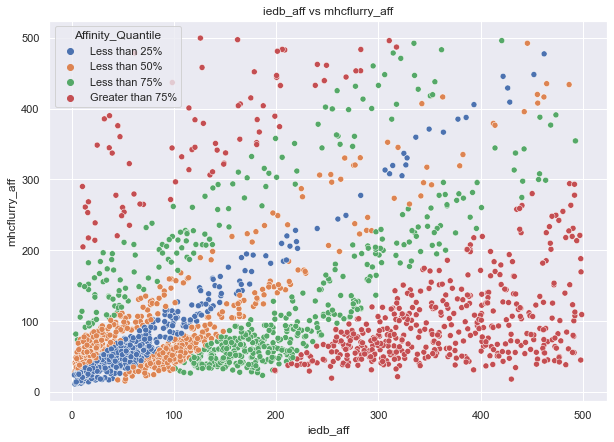

In [4]:
#important - added on iedb_aff & mhcflurry_aff slide
plt.figure(figsize = (10, 7))
sns.scatterplot(data = df, x = 'iedb_aff', y = 'mhcflurry_aff', hue = 'Affinity_Quantile', hue_order = ['Less than 25%',
                                                                                                       'Less than 50%', 
                                                                                                       'Less than 75%',
                                                                                                       'Greater than 75%'])
plt.title('iedb_aff vs mhcflurry_aff')

For difference below 3rd quantile(75% of values below 150), the iedb_aff & mhcflurry_aff are linearly proportional to each other.


In [7]:
pairs_less_than_25 = len(df[df['Affinity_Quantile'] == 'Less than 25%'])
total_pairs = len(df)

percent_pairs = pairs_less_than_25/total_pairs
percent_pairs

0.25034835113794707

<AxesSubplot:ylabel='diff_bw_iedb_aff_mhcflurry_aff'>

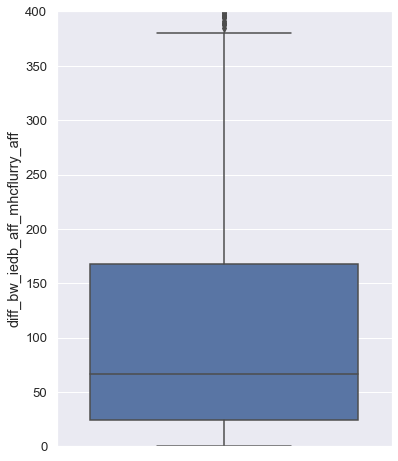

In [11]:
#important - added on iedb_aff & mhcflurry_aff slide
plt.figure(figsize = (6, 8))
sns.set(font_scale=1.2)
plt.ylim(0, 400, 50)
sns.boxplot(data = df, y = 'diff_bw_iedb_aff_mhcflurry_aff')

In [7]:
np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.75)

167.6527797741457

<AxesSubplot:xlabel='diff_bw_iedb_aff_mhcflurry_aff', ylabel='Count'>

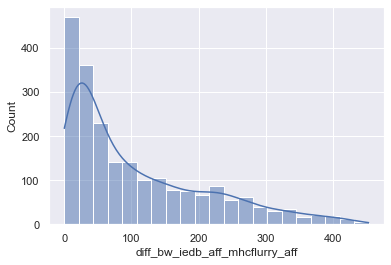

In [15]:
#not important 
sns.histplot(x = 'diff_bw_iedb_aff_mhcflurry_aff', data = df, kde = 'True')

**Null Hypothesis (Ho)** : IEDB_aff & MHCFlurry_aff vary uniformly. **Alternate Hypothesis (Ha)**: IEDB_aff & MHCFlurry_aff  does not vary uniformly. **Level of significane(Alpha)** = 0.05

In [5]:
kruskal(df['iedb_aff'], df['mhcflurry_aff'])

KruskalResult(statistic=131.61661938060115, pvalue=1.8149291954336615e-30)

As p<Alpha, Ho is rejected. That means IEDB_aff & MHCFlurry_aff  does not vary uniformly.

Text(0.5, 1.0, 'length vs diff_bw_iedb_aff_mhcflurry_aff')

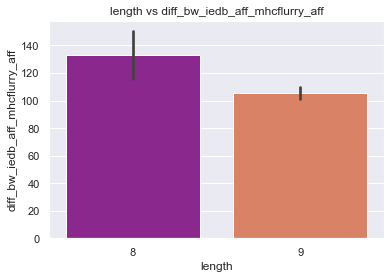

In [9]:
#important - added on iedb_aff & mhcflurry_aff slide
sns.barplot(x ='length', y ='diff_bw_iedb_aff_mhcflurry_aff', data = df,
            palette ='plasma')
plt.title('length vs diff_bw_iedb_aff_mhcflurry_aff')

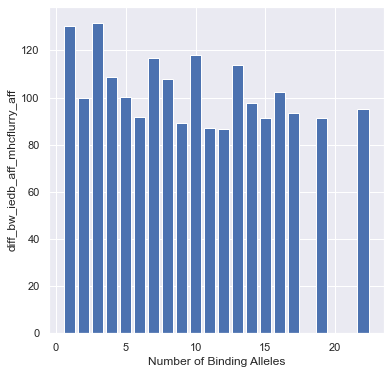

In [8]:
#not important
plt.figure(figsize = (6, 6))
dba = df.groupby('number_binding_alleles')['diff_bw_iedb_aff_mhcflurry_aff'].mean()
plt.bar(dba.index, dba.values)
plt.xlabel('Number of Binding Alleles')
plt.ylabel('diff_bw_iedb_aff_mhcflurry_aff')
plt.show()

<AxesSubplot:xlabel='protein_id', ylabel='diff_bw_iedb_aff_mhcflurry_aff'>

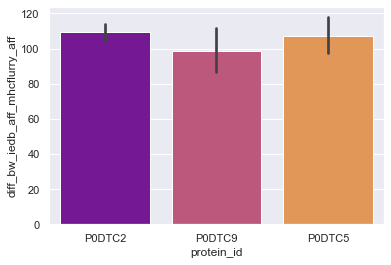

In [17]:
#important - added on iedb_aff & mhcflurry_aff slide
sns.barplot(x ='protein_id', y ='diff_bw_iedb_aff_mhcflurry_aff', data = df,
            palette ='plasma')

P0DTC9 have lower difference for affinity scores

<AxesSubplot:xlabel='number_binding_alleles', ylabel='population_coverage'>

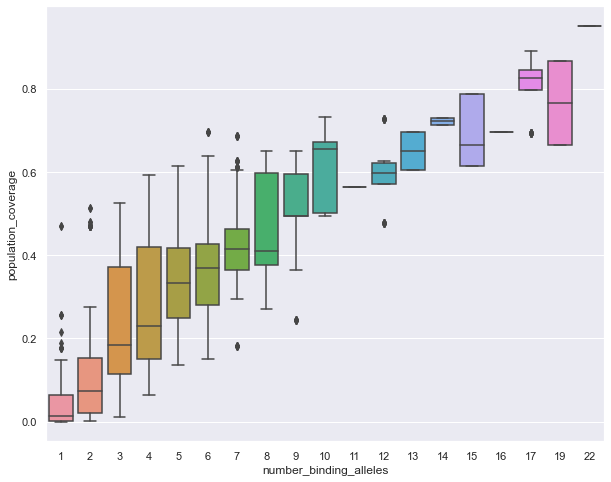

In [71]:
#important - added on population coverage slide
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'number_binding_alleles', y = 'population_coverage', data = df)

As the number of binding alleles increases, the population coverage also increases

<AxesSubplot:xlabel='number_binding_alleles', ylabel='genot_freq_sum_per_epitope'>

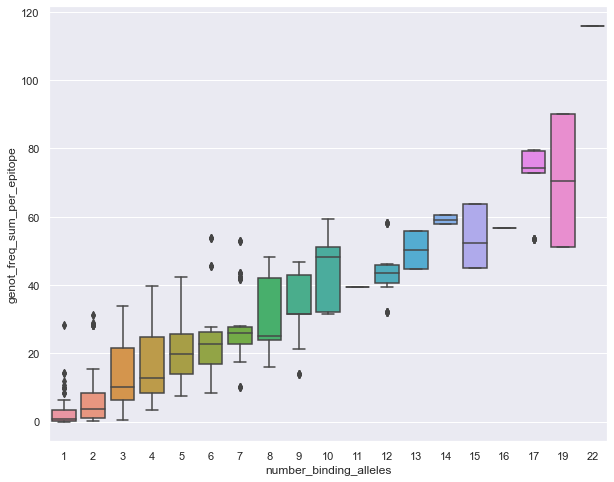

In [6]:
#important - added on population coverage slide
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'number_binding_alleles', y = 'genot_freq_sum_per_epitope', data = df)

<AxesSubplot:xlabel='population_coverage', ylabel='genot_freq_sum_per_epitope'>

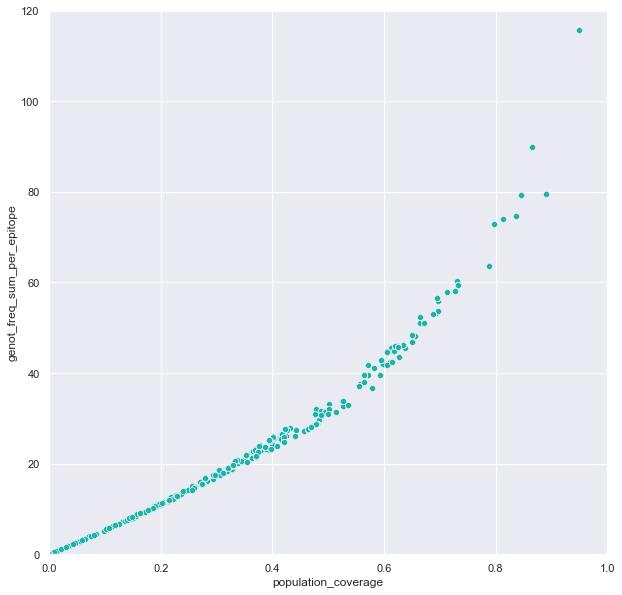

In [18]:
#important - added on population coverage slide
plt.figure(figsize = (10, 10))
plt.xlim([0,1])
plt.ylim([0,120])
sns.scatterplot(data = df, x = 'population_coverage', y = 'genot_freq_sum_per_epitope', color = 'lightseagreen')

The genot_freq_sum_per_epitope increases with the increase in population_coverage

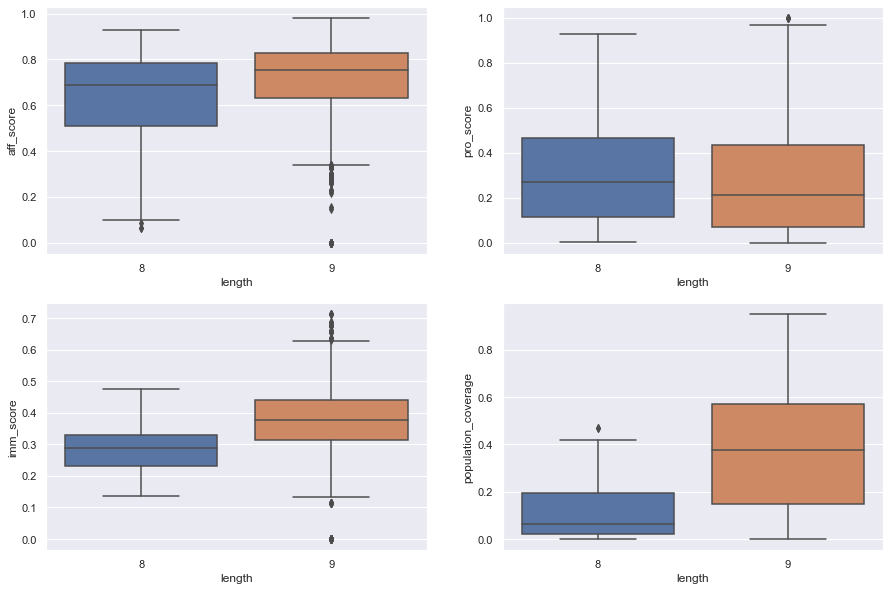

In [14]:
#important - added on length slide
fig, axes = plt.subplots(2,2, figsize = (15, 10)) 

for param, ax in zip(rank_formula_features, axes.flatten()):
    sns.boxplot(data=df, x='length', y=param, ax = ax)

The imm_score & population_coverage are relatively higher for length 9

<AxesSubplot:xlabel='length', ylabel='rank_score'>

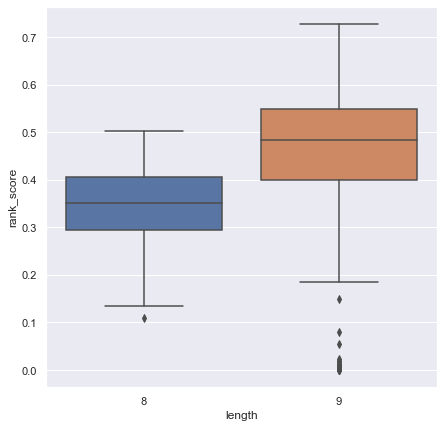

In [15]:
#important - added on length slide

plt.figure(figsize = (7,7))
sns.boxplot(data=df, x='length', y='rank_score')

Peptides of length 9 have relatively higher rank 

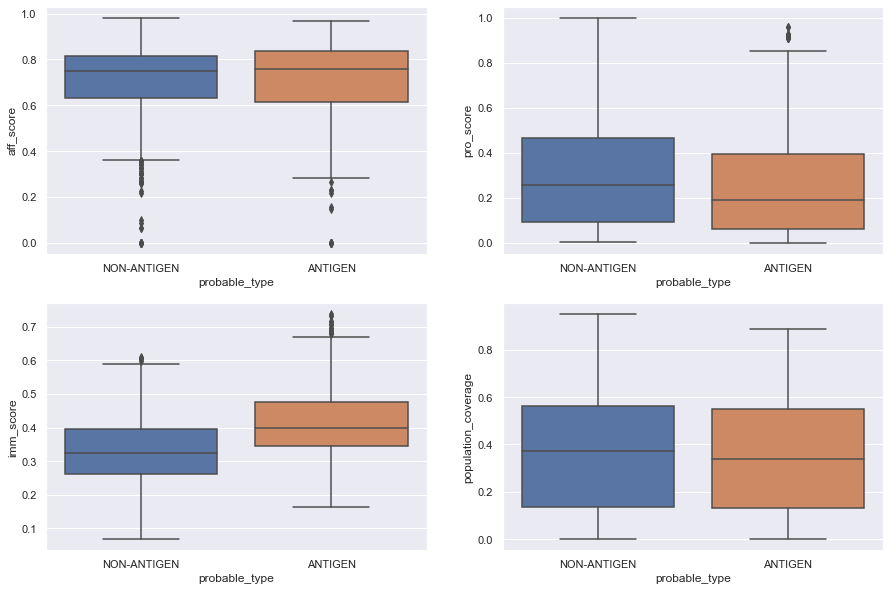

In [4]:
#not important
fig, axes = plt.subplots(2,2, figsize = (15, 10)) 

for param, ax in zip(rank_formula_features, axes.flatten()):
    sns.boxplot(data=df, x='probable_type', y=param, ax = ax)

<AxesSubplot:xlabel='probable_type', ylabel='rank_score'>

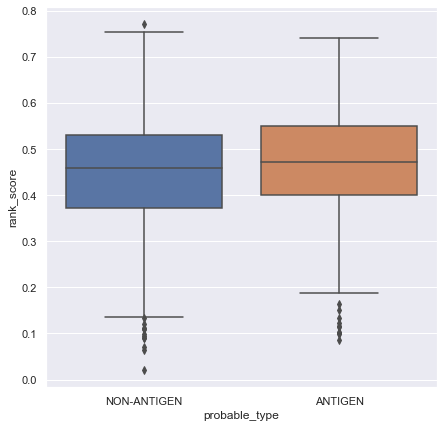

In [5]:
#not important
plt.figure(figsize = (7,7))
sns.boxplot(data=df, x='probable_type', y='rank_score')

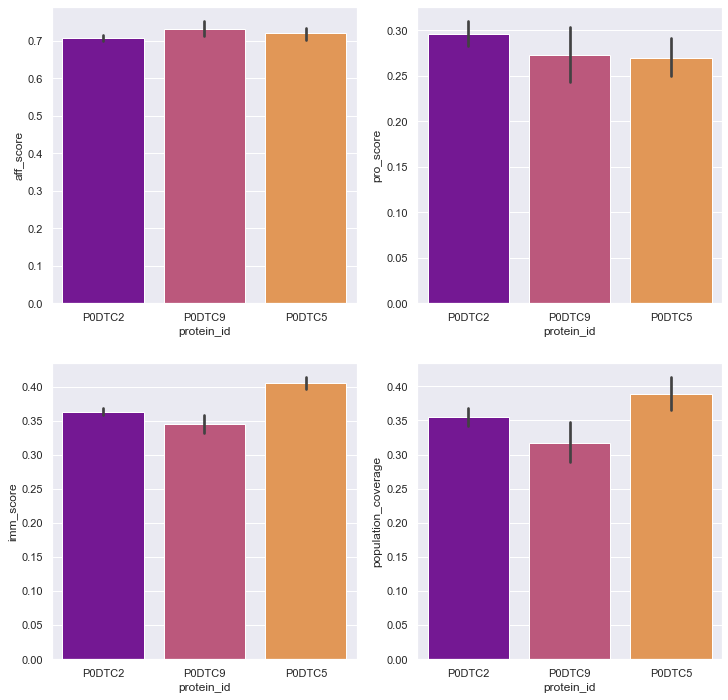

In [24]:
#not important
fig, axes = plt.subplots(2,2, figsize = (12, 12)) 

for param, ax in zip(rank_formula_features, axes.flatten()):
    sns.barplot(x ='protein_id', y =param, data = df,
            palette ='plasma', ax = ax)

Peptides derived from P0DTC5 has highest imm_score & population_coverage. P0DTC2 has higher pro_score.

<AxesSubplot:xlabel='protein_id', ylabel='rank_score'>

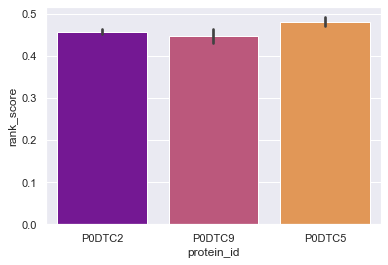

In [37]:
#not important
sns.barplot(x ='protein_id', y ='rank_score', data = df,
            palette ='plasma')

In [14]:
df['diff_bw_immunogenicity_score_prime_score'] = np.abs(df['immunogenicity_score'] - df['prime_score'])

def labelquartile(diff):
    if diff <= np.quantile(df['diff_bw_immunogenicity_score_prime_score'], 0.25):
        return 'Less than 25%'
    elif diff > np.quantile(df['diff_bw_immunogenicity_score_prime_score'], 0.25) and diff <=  np.quantile(df['diff_bw_immunogenicity_score_prime_score'], 0.5):
        return 'Less than 50%'
    elif diff > np.quantile(df['diff_bw_immunogenicity_score_prime_score'], 0.5) and diff <= np.quantile(df['diff_bw_immunogenicity_score_prime_score'], 0.75):
        return 'Less than 75%'
    else:
        return 'Greater than 75%'
    
df['Immunogenicity_Quantile'] = df['diff_bw_immunogenicity_score_prime_score'].apply(labelquartile)
df.head()

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,sw_prime_score,pair_imm_score,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score,diff_bw_iedb_aff_mhcflurry_aff,Affinity_Quantile,diff_bw_immunogenicity_score_prime_score,Immunogenicity_Quantile
0,HLA-A*02:03,YLQPRTFLL,6.59,P0DTC2,12.498252,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.127588,...,0.357114,0.000000,0.441927,0.839536,0.839536,0.727339,5.908252,Less than 25%,0.002912,Less than 25%
1,HLA-A*02:01,YLQPRTFLL,4.30,P0DTC2,12.304971,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.228937,...,0.642115,0.125367,0.441927,0.839536,0.839536,0.727339,8.004971,Less than 25%,0.098437,Less than 50%
2,HLA-A*29:02,YLQPRTFLL,349.55,P0DTC2,371.195028,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.046896,...,0.130202,0.005576,0.441927,0.839536,0.839536,0.727339,21.645028,Less than 25%,0.083604,Less than 50%
3,HLA-A*24:02,YLQPRTFLL,274.80,P0DTC2,207.543471,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.151580,...,0.424581,0.036070,0.441927,0.839536,0.839536,0.727339,67.256529,Less than 75%,0.021080,Less than 25%
4,HLA-A*23:01,YLQPRTFLL,189.75,P0DTC2,290.054507,0.810831,22,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.1305,0.148831,...,0.416851,0.008603,0.441927,0.839536,0.839536,0.727339,100.304507,Less than 75%,0.018331,Less than 25%


Text(0.5, 1.0, 'immunogenicity_score vs prime_score')

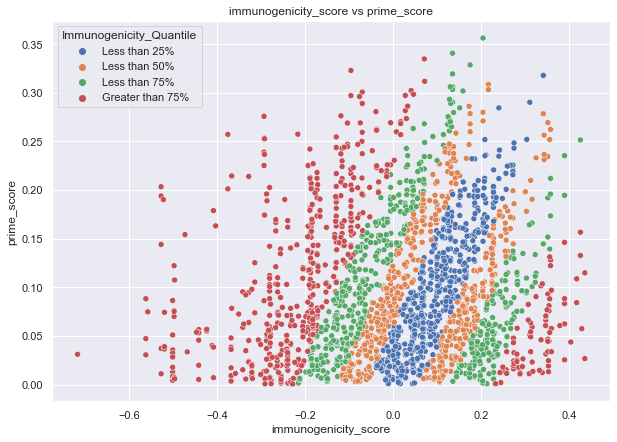

In [12]:
#important - added on immunogenicity_score & prime_score slide
plt.figure(figsize = (10, 7))
sns.scatterplot(data = df, x = 'immunogenicity_score', y = 'prime_score', hue = 'Immunogenicity_Quantile')
plt.title('immunogenicity_score vs prime_score')

<AxesSubplot:ylabel='diff_bw_immunogenicity_score_prime_score'>

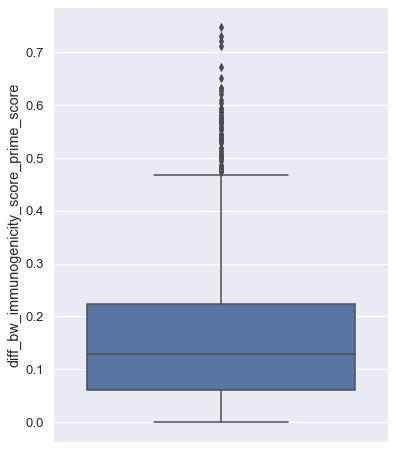

In [15]:
#important - added on immunogenicity_score & prime_score slide
plt.figure(figsize = (6, 8))
sns.set(font_scale=1.2)
sns.boxplot(data = df, y = 'diff_bw_immunogenicity_score_prime_score')

In [16]:
np.quantile(df['diff_bw_immunogenicity_score_prime_score'], 0.75)

0.223512

<AxesSubplot:xlabel='diff_bw_immunogenicity_score_prime_score', ylabel='Count'>

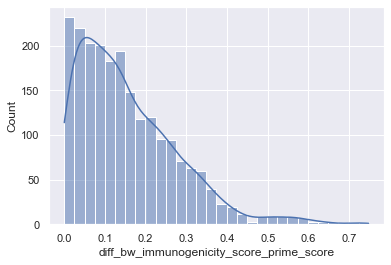

In [19]:
#not important
sns.histplot(x = 'diff_bw_immunogenicity_score_prime_score', data = df, kde = 'True')

For difference below 3rd quantile(75% of values below 0.2), the immunogenicity_score & prime_score are linearly proportional to each other.

**Null Hypothesis (Ho)** : immunogenicity_score & prime_score vary uniformly. **Alternate Hypothesis (Ha)**: IEDB_aff & MHCFlurry_aff  does not vary uniformly. **Level of significane(Alpha)** = 0.05

In [7]:
kruskal(df['immunogenicity_score'], df['prime_score'])

KruskalResult(statistic=229.49377694684574, pvalue=7.686734986079729e-52)

As p<Alpha, Ho is rejected. That means Immunogenicity_score & Prime_score  does not vary uniformly.

Text(0.5, 1.0, 'length vs diff_bw_immunogenicity_score_prime_score')

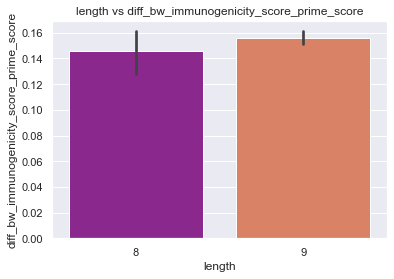

In [14]:
#important - added on immunogenicity_score & prime_score slide
sns.barplot(x ='length', y ='diff_bw_immunogenicity_score_prime_score', data = df,
            palette ='plasma')
plt.title('length vs diff_bw_immunogenicity_score_prime_score')

<AxesSubplot:xlabel='protein_id', ylabel='diff_bw_immunogenicity_score_prime_score'>

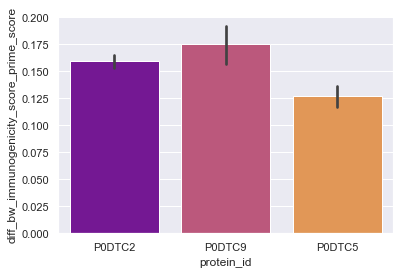

In [18]:
#important - added on immunogenicity_score & prime_score slide
sns.barplot(x ='protein_id', y ='diff_bw_immunogenicity_score_prime_score', data = df,
            palette ='plasma')

P0DTC5 has min difference

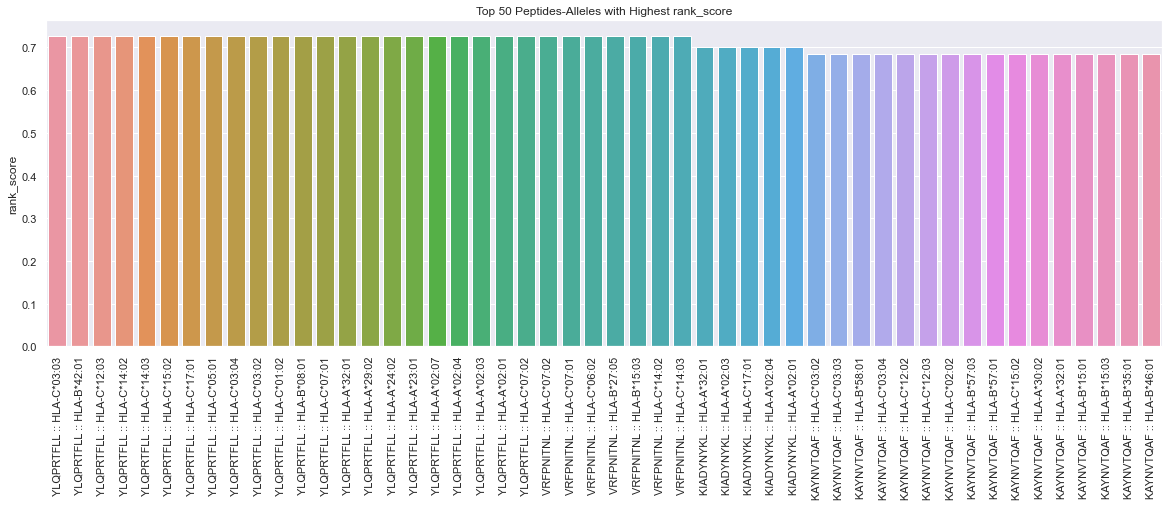

In [13]:
af = df.groupby(['peptide', 'allele'])['rank_score'].mean().sort_values(ascending = False)[:50]
li = []
for i in range(len(af)):
    c = ' :: '.join(af.index[i])
    li.append(c)
plt.figure(figsize=(20, 6))
sns.barplot(li, af.values[:50])
plt.title(f'Top 50 Peptides-Alleles with Highest rank_score')
plt.ylabel('rank_score')
plt.xticks(rotation=90)
plt.show()
    

In [18]:
#SCORES SUMMARY for 30 top-ranked epitopes
top_ep_scores = df.groupby(['peptide'])['rank_score', 'imm_score', 'aff_score',  'population_coverage', 'pro_score'].max().sort_values(by='rank_score', ascending = False)[:30]
top_ep_scores

,rank_score,imm_score,aff_score,population_coverage,pro_score
peptide,,,,,
YLQPRTFLL,0.727339,0.441927,0.752391,0.9503,0.839536
VRFPNITNL,0.726398,0.659248,0.861041,0.6267,0.823015
KIADYNYKL,0.701568,0.608305,0.948679,0.5271,0.763431
KAYNVTQAF,0.685307,0.418538,0.916009,0.6649,0.854730
NRFLYIIKL,0.681103,0.581546,0.747601,0.6382,0.908985
KTFPPTEPK,0.675163,0.545876,0.944202,0.4566,0.911594
VVFLHVTYV,0.667289,0.613878,0.897494,0.5984,0.343571
QYIKWPWYI,0.645110,0.712098,0.934641,0.2291,0.823584
IAIPTNFTI,0.641723,0.486849,0.778269,0.6143,0.778974


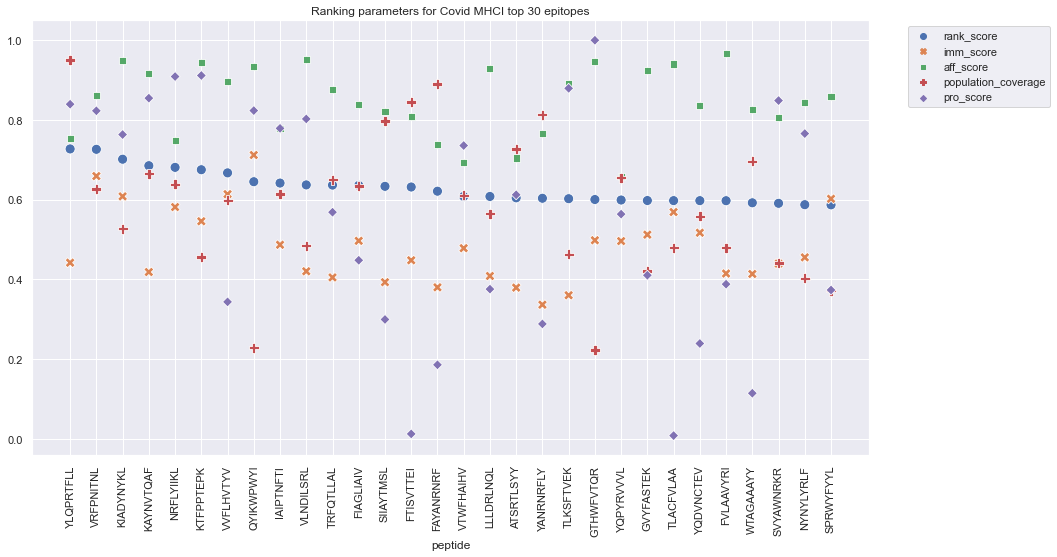

In [20]:
#important- create a scatter plot
plt.figure(figsize=(15, 8))
sns.scatterplot(data=top_ep_scores, s=100)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Ranking parameters for Covid MHCI top 30 epitopes')
plt.show()

<AxesSubplot:>

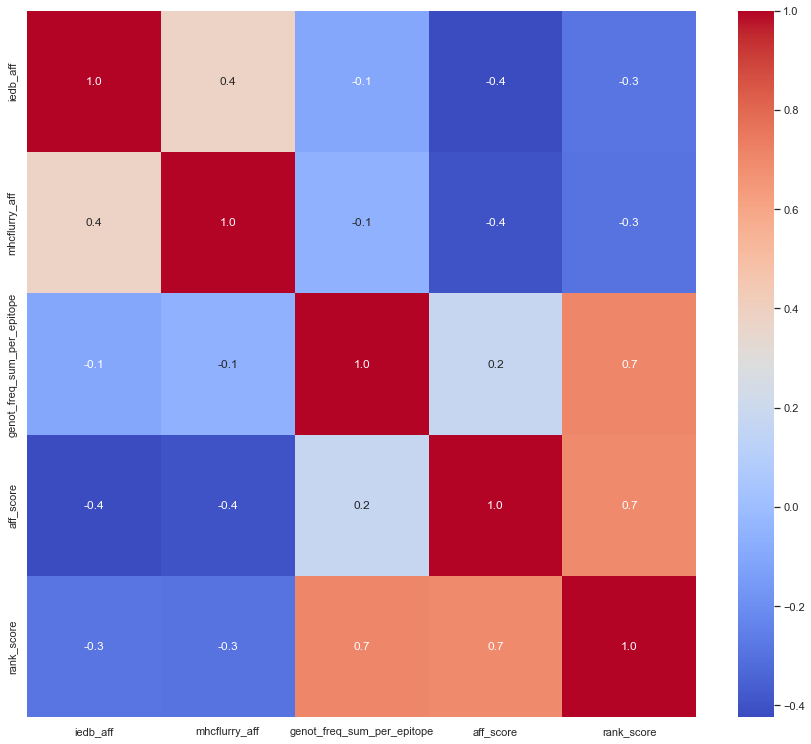

In [29]:
a = ['iedb_aff', 'mhcflurry_aff', 'genot_freq_sum_per_epitope',
     'aff_score', 'rank_score']
correlation = df[a].corr()
plt.figure(figsize = (15, 13))
sns.heatmap(data = correlation, cmap = 'coolwarm', annot = True, fmt = '.1f')

<AxesSubplot:>

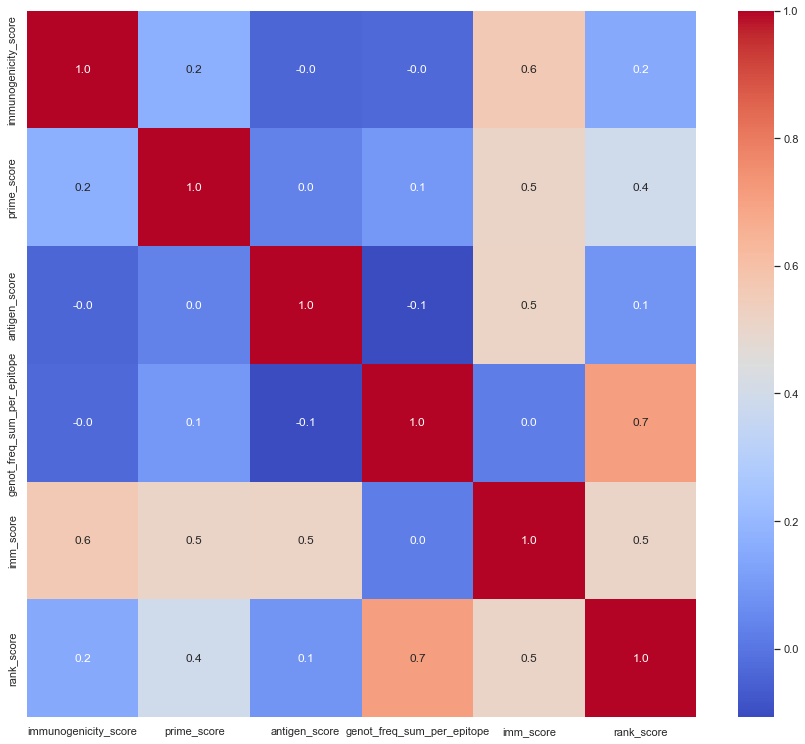

In [3]:
i = ['immunogenicity_score', 'prime_score', 'antigen_score', 
     'genot_freq_sum_per_epitope',  'imm_score', 'rank_score']

correlation = df[i].corr()
plt.figure(figsize = (15, 13))
sns.heatmap(data = correlation, cmap = 'coolwarm', annot = True, fmt = '.1f')

<AxesSubplot:>

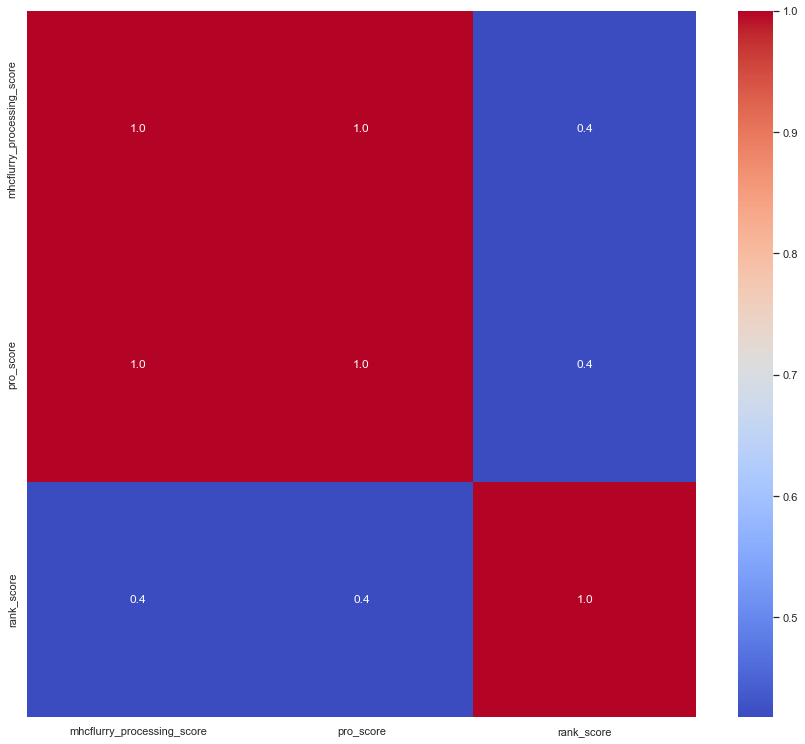

In [34]:
p =  ['mhcflurry_processing_score', 'pro_score', 'rank_score']
correlation = df[p].corr()
plt.figure(figsize = (15, 13))
sns.heatmap(data = correlation, cmap = 'coolwarm', annot = True, fmt = '.1f')

<AxesSubplot:>

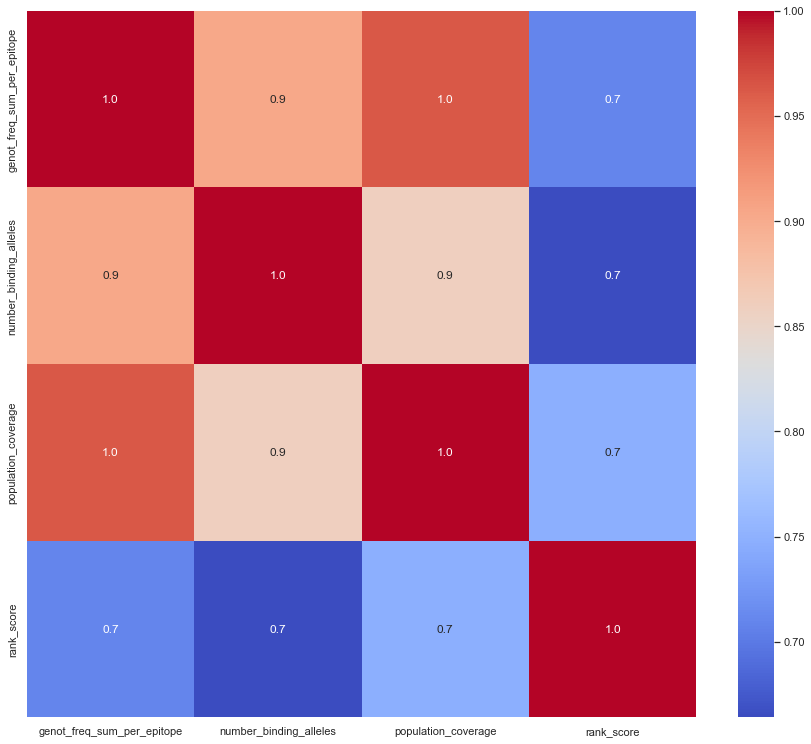

In [32]:
pc = ['genot_freq_sum_per_epitope', 'number_binding_alleles', 'population_coverage', 'rank_score']
correlation = df[pc].corr()
plt.figure(figsize = (15, 13))
sns.heatmap(data = correlation, cmap = 'coolwarm', annot = True, fmt = '.1f')

<AxesSubplot:>

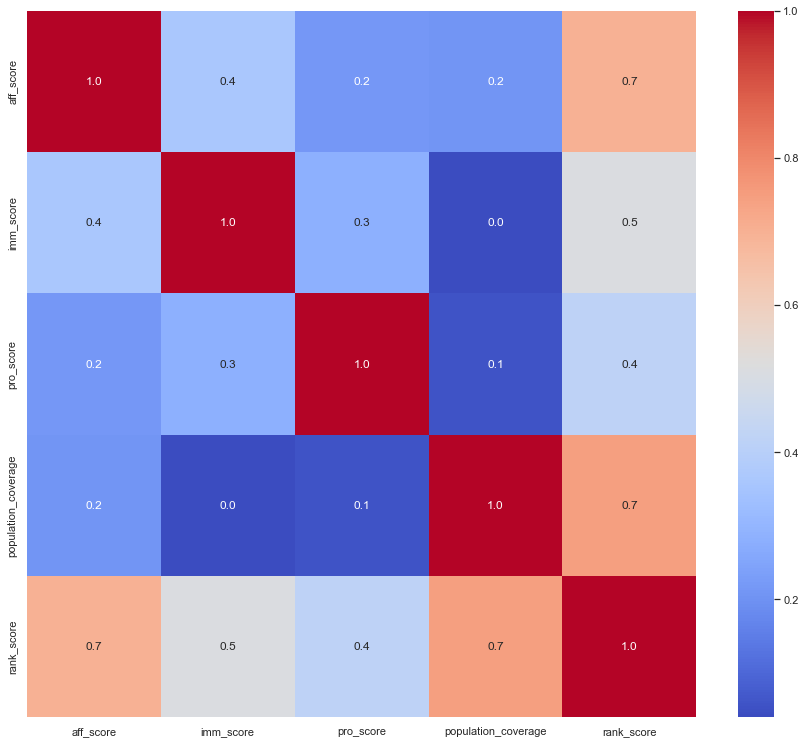

In [26]:
r = ['aff_score', 'imm_score', 'pro_score', 'population_coverage', 'rank_score']
correlation = df[r].corr()
plt.figure(figsize = (15, 13))
sns.heatmap(data = correlation, cmap = 'coolwarm', annot = True, fmt = '.1f')